## 데이터 불러오기

In [ ]:
# Mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
# Read Data
skt =  pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/SK/skt.csv', index_col='Unnamed: 0')
ska = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/SK/ska.csv', index_col='Unnamed: 0')

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

# 업무지구 vs 주거지구

In [ ]:
# dtype (int -> datetime) 변경
# index 설정 및 통합 data 만들기
skt_backup = skt
skt['STD_YMD'] = pd.to_datetime(skt['STD_YMD'].astype(str), format='%Y%m%d') # dtype datetime으로 변경
skt = skt.set_index(['HDONG_NM', 'STD_YMD']) # index로 설정

ska_backup = ska
ska['STD_YMD'] = pd.to_datetime(ska['STD_YMD'].astype(str), format='%Y%m%d') # dtype datetime으로 변경
ska = ska.set_index(['HDONG_NM', 'STD_YMD']) # index로 설정

sk = pd.concat([skt, ska.iloc[:,4:]], axis=1)
sk_backup = sk

In [ ]:
# 다시 나누기
skt = skt_backup
skt = skt.set_index('STD_YMD', drop=False)

ska = ska_backup
ska = ska.set_index('STD_YMD', drop=False)

In [ ]:
# 지구 정보 추가
temp = skt['HDONG_CD'].astype(str).str.slice(start=0, stop=5)
temp = temp.apply(lambda x: '업무지구' if x == "11140" else x)
temp = temp.apply(lambda x: '주거지구' if x == "11350" else x)
temp = temp.apply(lambda x: '업무지구' if x == "27110" else x)
temp = temp.apply(lambda x: '주거지구' if x == "27260" else x)
skt['JGU_NM'] = temp

# 지구 정보 추가
temp = ska['HDONG_CD'].astype(str).str.slice(start=0, stop=5)
temp = temp.apply(lambda x: '업무지구' if x == "11140" else x)
temp = temp.apply(lambda x: '주거지구' if x == "11350" else x)
temp = temp.apply(lambda x: '업무지구' if x == "27110" else x)
temp = temp.apply(lambda x: '주거지구' if x == "27260" else x)
ska['JGU_NM'] = temp

In [ ]:
# 컬럼 순서 변경
skt = skt[['STD_YMD', 'STD_YM', 'JGU_NM', 'HDONG_CD', 'HDONG_NM', 'TMST_00', 'TMST_01', 'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07', 'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13', 'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19', 'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

ska = ska[['STD_YMD', 'STD_YM', 'JGU_NM', 'HDONG_CD', 'HDONG_NM', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509', 'MAN_FLOW_POP_CNT_1014','MAN_FLOW_POP_CNT_1519', 'MAN_FLOW_POP_CNT_2024','MAN_FLOW_POP_CNT_2529', 'MAN_FLOW_POP_CNT_3034','MAN_FLOW_POP_CNT_3539', 'MAN_FLOW_POP_CNT_4044',
       'MAN_FLOW_POP_CNT_4549', 'MAN_FLOW_POP_CNT_5054',
       'MAN_FLOW_POP_CNT_5559', 'MAN_FLOW_POP_CNT_6064',
       'MAN_FLOW_POP_CNT_6569', 'MAN_FLOW_POP_CNT_70U',
       'WMAN_FLOW_POP_CNT_0004', 'WMAN_FLOW_POP_CNT_0509',
       'WMAN_FLOW_POP_CNT_1014', 'WMAN_FLOW_POP_CNT_1519',
       'WMAN_FLOW_POP_CNT_2024', 'WMAN_FLOW_POP_CNT_2529',
       'WMAN_FLOW_POP_CNT_3034', 'WMAN_FLOW_POP_CNT_3539',
       'WMAN_FLOW_POP_CNT_4044', 'WMAN_FLOW_POP_CNT_4549',
       'WMAN_FLOW_POP_CNT_5054', 'WMAN_FLOW_POP_CNT_5559',
       'WMAN_FLOW_POP_CNT_6064', 'WMAN_FLOW_POP_CNT_6569',
       'WMAN_FLOW_POP_CNT_70U']]

In [ ]:
# 시간대 나누기
# 7-11 아침(TMST_MON) / 11-14 점심 / 14-18 오후 / 18-22 저녁 / 22-7 심야
skt['TMST_MORNING'] = np.mean(skt.iloc[:,13:17], axis=1)
skt['TMST_NOON'] = np.mean(skt.iloc[:,17:20], axis=1)
skt['TMST_AFTNOON'] = np.mean(skt.iloc[:,20:24], axis=1)
skt['TMST_NIGHT'] = np.mean(skt.iloc[:,24:28], axis=1)
skt['TMST_DAWN'] = np.mean(pd.concat([skt.iloc[:, 28:30], skt.iloc[:, 7:13]], axis=1), axis=1)

skt = skt[['STD_YMD', 'JGU_NM', 'HDONG_NM', 'TMST_MORNING', 'TMST_NOON', 'TMST_AFTNOON', 'TMST_NIGHT', 'TMST_DAWN']]

# 연령대 나누기
ska['MAN_CNT_00'] = np.mean(ska.iloc[:,5:7], axis=1) # < 10
ska['MAN_CNT_10'] = np.mean(ska.iloc[:,7:9], axis=1) # 10대
ska['MAN_CNT_20'] = np.mean(ska.iloc[:,9:11], axis=1) # 20대
ska['MAN_CNT_30'] = np.mean(ska.iloc[:,11:13], axis=1) # 30대
ska['MAN_CNT_40'] = np.mean(ska.iloc[:,13:15], axis=1) # 40대
ska['MAN_CNT_50'] = np.mean(ska.iloc[:,15:17], axis=1) # 50대
ska['MAN_CNT_60'] = np.mean(ska.iloc[:,17:19], axis=1) # 60대
ska['MAN_CNT_70U'] = np.mean(ska.iloc[:,19:20], axis=1) # > 70

ska['WMAN_CNT_00'] = np.mean(ska.iloc[:,20:22], axis=1) # < 10
ska['WMAN_CNT_10'] = np.mean(ska.iloc[:,22:24], axis=1) # 10대
ska['WMAN_CNT_20'] = np.mean(ska.iloc[:,24:26], axis=1) # 20대
ska['WMAN_CNT_30'] = np.mean(ska.iloc[:,26:28], axis=1) # 30대
ska['WMAN_CNT_40'] = np.mean(ska.iloc[:,28:30], axis=1) # 40대
ska['WMAN_CNT_50'] = np.mean(ska.iloc[:,30:32], axis=1) # 50대
ska['WMAN_CNT_60'] = np.mean(ska.iloc[:,32:34], axis=1) # 60대
ska['WMAN_CNT_70U'] = np.mean(ska.iloc[:,34:35], axis=1) # > 70

ska = ska[['STD_YMD', 'JGU_NM', 'HDONG_NM', 'MAN_CNT_00', 'MAN_CNT_10', 'MAN_CNT_20', 'MAN_CNT_30', 'MAN_CNT_40', 'MAN_CNT_50', 'MAN_CNT_60', 'MAN_CNT_70U', 'WMAN_CNT_00', 'WMAN_CNT_10', 'WMAN_CNT_20', 'WMAN_CNT_30', 'WMAN_CNT_40', 'WMAN_CNT_50', 'WMAN_CNT_60', 'WMAN_CNT_70U']]
ska_backup2 = ska.copy()

In [ ]:
# 데이터 만들기
def make_data1(data, JGU_NM):
    data_g = data[data.JGU_NM == JGU_NM]
    data_g = data_g.resample('D').sum() # 클러스터링 하고 여기가 바껴야 함
    data_g = data_g.iloc[1:484]
    data_g = data_g.resample('W-Fri').sum()

    data_g_f = pd.concat([data_g.iloc[:17,].reset_index(), data_g.iloc[52:,].reset_index()], axis=1)
    data_g_f.columns = ['STD_YMD_19', 'TMST_MORNING_19', 'TMST_NOON_19', 'TMST_AFTNOON_19', 'TMST_NIGHT_19', 'TMST_DAWN_19', 
                        'STD_YMD_20', 'TMST_MORNING_20', 'TMST_NOON_20', 'TMST_AFTNOON_20', 'TMST_NIGHT_20', 'TMST_DAWN_20']
    data_g_f.drop(['STD_YMD_19', 'STD_YMD_20'], axis=1,inplace=True)
    data_g_f.index = ['2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4','4-5','5-1', '5-2', '5-3', '5-4']

    return data_g_f

In [ ]:
# 데이터 만들기
def make_data2(data, JGU_NM):
    data_g = data[data.JGU_NM == JGU_NM]
    data_g = data_g.resample('D').sum() # 클러스터링 하고 여기가 바껴야 함
    data_g = data_g.iloc[1:484]
    data_g = data_g.resample('W-Fri').sum()

    data_g_f = pd.concat([data_g.iloc[:17,].reset_index(), data_g.iloc[52:,].reset_index()], axis=1) # NA 행 지우고 연도별로 추출해야 일반화시켜야 쓰기 편할듯
    data_g_f.columns = ['STD_YMD_19', 'MAN_CNT_00_19', 'MAN_CNT_10_19', 'MAN_CNT_20_19', 'MAN_CNT_30_19', 'MAN_CNT_40_19', 'MAN_CNT_50_19', 'MAN_CNT_60_19', 'MAN_CNT_70U_19', 'WMN_CNT_00_19', 'WMN_CNT_10_19', 'WMN_CNT_20_19', 'WMN_CNT_30_19', 'WMN_CNT_40_19', 'WMN_CNT_50_19', 'WMN_CNT_60_19', 'WMN_CNT_70U_19', 
                           'STD_YMD_20', 'MAN_CNT_00_20', 'MAN_CNT_10_20', 'MAN_CNT_20_20', 'MAN_CNT_30_20', 'MAN_CNT_40_20', 'MAN_CNT_50_20', 'MAN_CNT_60_20', 'MAN_CNT_70U_20', 'WMN_CNT_00_20', 'WMN_CNT_10_20', 'WMN_CNT_20_20', 'WMN_CNT_30_20', 'WMN_CNT_40_20', 'WMN_CNT_50_20', 'WMN_CNT_60_20', 'WMN_CNT_70U_20']
    data_g_f['10대_19'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_10_19'],data_g_f.loc[:,'WMN_CNT_10_19']],axis=1), axis=1)
    data_g_f['20대_19'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_20_19'],data_g_f.loc[:,'WMN_CNT_20_19']],axis=1), axis=1)
    data_g_f['30대_19'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_30_19'],data_g_f.loc[:,'WMN_CNT_30_19']],axis=1), axis=1)
    data_g_f['40대_19'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_40_19'],data_g_f.loc[:,'WMN_CNT_40_19']],axis=1), axis=1)
    data_g_f['50대_19'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_50_19'],data_g_f.loc[:,'WMN_CNT_50_19']],axis=1), axis=1)
    data_g_f['60이상_19'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_60_19'],data_g_f.loc[:,'MAN_CNT_70U_19'],data_g_f.loc[:,'WMN_CNT_60_19'],data_g_f.loc[:,'MAN_CNT_70U_19']],axis=1), axis=1)

    data_g_f['10대_20'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_10_20'],data_g_f.loc[:,'WMN_CNT_10_20']],axis=1), axis=1)
    data_g_f['20대_20'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_20_20'],data_g_f.loc[:,'WMN_CNT_20_20']],axis=1), axis=1)
    data_g_f['30대_20'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_30_20'],data_g_f.loc[:,'WMN_CNT_30_20']],axis=1), axis=1)
    data_g_f['40대_20'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_40_20'],data_g_f.loc[:,'WMN_CNT_40_20']],axis=1), axis=1)
    data_g_f['50대_20'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_50_20'],data_g_f.loc[:,'WMN_CNT_50_20']],axis=1), axis=1)
    data_g_f['60이상_20'] = np.sum(pd.concat([data_g_f.loc[:,'MAN_CNT_60_20'],data_g_f.loc[:,'MAN_CNT_70U_20'],data_g_f.loc[:,'WMN_CNT_60_20'],data_g_f.loc[:,'MAN_CNT_70U_20']],axis=1), axis=1)

    data_g_f.drop(['STD_YMD_19', 'MAN_CNT_00_19', 'MAN_CNT_10_19', 'MAN_CNT_20_19', 'MAN_CNT_30_19', 'MAN_CNT_40_19', 'MAN_CNT_50_19', 'MAN_CNT_60_19', 'MAN_CNT_70U_19', 'WMN_CNT_00_19', 'WMN_CNT_10_19', 'WMN_CNT_20_19', 'WMN_CNT_30_19', 'WMN_CNT_40_19', 'WMN_CNT_50_19', 'WMN_CNT_60_19', 'WMN_CNT_70U_19', 
                           'STD_YMD_20', 'MAN_CNT_00_20', 'MAN_CNT_10_20', 'MAN_CNT_20_20', 'MAN_CNT_30_20', 'MAN_CNT_40_20', 'MAN_CNT_50_20', 'MAN_CNT_60_20', 'MAN_CNT_70U_20', 'WMN_CNT_00_20', 'WMN_CNT_10_20', 'WMN_CNT_20_20', 'WMN_CNT_30_20', 'WMN_CNT_40_20', 'WMN_CNT_50_20', 'WMN_CNT_60_20', 'WMN_CNT_70U_20'], axis=1,inplace=True)
    data_g_f.index = ['2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4','4-5','5-1', '5-2', '5-3', '5-4']

    return data_g_f

In [ ]:
def issue_line2(min, mycolor):
    plt.axvline(x='2-3',color=mycolor,linestyle='--')
    plt.text('2-3',min,'신천지', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
    plt.axvline(x='3-2',color=mycolor,linestyle='--')
    plt.text('3-2',min, '마스크 5부제', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
    plt.axvline(x='3-4', color=mycolor,linestyle='--')
    plt.text('3-4',min, '사회적 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
    plt.axvline(x='4-2', color=mycolor,linestyle='--')
    plt.text('4-2', min, '고강도 사회적 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
    plt.axvline(x='5-1', color=mycolor,linestyle='--')
    plt.text('5-1',min,'생활속 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')

In [ ]:
skt1 = make_data1(skt, '업무지구')
skt2 = make_data1(skt, '주거지구')
ska1 = make_data2(ska, '업무지구')
ska2 = make_data2(ska, '주거지구')

In [ ]:
skt1_19 = pd.DataFrame(np.sum(skt1.iloc[:,0:5].T,axis=1), columns=['유동인구']).reset_index(drop=False)
skt1_20 = pd.DataFrame(np.sum(skt1.iloc[:,5:].T,axis=1), columns=['유동인구']).reset_index(drop=False)

In [ ]:
skt2_19 = pd.DataFrame(np.sum(skt2.iloc[:,0:5].T,axis=1), columns=['유동인구']).reset_index(drop=False)
skt2_20 = pd.DataFrame(np.sum(skt2.iloc[:,5:].T,axis=1), columns=['유동인구']).reset_index(drop=False)

In [ ]:
ska1_19 = pd.DataFrame(np.sum(ska1.iloc[:,0:6].T,axis=1), columns=['유동인구']).reset_index(drop=False)
ska1_20 = pd.DataFrame(np.sum(ska1.iloc[:,6:].T,axis=1), columns=['유동인구']).reset_index(drop=False)

In [ ]:
ska2_19 = pd.DataFrame(np.sum(ska2.iloc[:,0:6].T,axis=1), columns=['유동인구']).reset_index(drop=False)
ska2_20 = pd.DataFrame(np.sum(ska2.iloc[:,6:].T,axis=1), columns=['유동인구']).reset_index(drop=False)

### 바그래프로 확인

In [ ]:
scf_cat_bar_amt = scf_cat_bar.loc['USE_AMT'].reset_index()
scf_cat_bar_cnt = scf_cat_bar.loc['USE_CNT'].sort_values(by=2019,ascending=False).reset_index()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))
plt.subplots_adjust(wspace = 0.05) # hspace = 0.2

ax1.bar(scf_cat_bar_amt.index-0.2, scf_cat_bar_amt.loc[:,2019], width=0.4, color = 'lightgrey', label="2019")
ax1.bar(scf_cat_bar_amt.index+0.2, scf_cat_bar_amt.loc[:,2020], width=0.4, label="2020")

# for i in range(5):
#   # ax1.plot([i-0.2,i+0.2],scf_cat_bar_amt.iloc[i,1:3],marker='o',color='r',linestyle='--')
#   ax1.text(x=i-0.07,y=scf_cat_bar_amt.iloc[i,2]+10000000,s=(str(round(scf_cat_bar_amt.iloc[i,3],1))+'%'),color='r',fontsize=15)

ax1.set_title('2019년 & 2020년 신한카드 외국인 카테고리별 이용금액(Top5)', fontsize=20)
ax1.legend(prop={'size': 12})
ax1.set_xticks(np.array(range(5)))
ax1.set_xticklabels(list(scf_cat_bar_amt.MCT_CAT_CD),fontsize=12)


ax2.bar(scf_cat_bar_cnt.index-0.2, scf_cat_bar_cnt.loc[:,2019], width=0.4, color = 'lightgrey', label="2019")
ax2.bar(scf_cat_bar_cnt.index+0.2, scf_cat_bar_cnt.loc[:,2020], width=0.4, label="2020")
for i in range(5):
  # ax2.plot([i-0.2,i+0.2],scf_cat_bar_cnt.iloc[i,1:3],marker='o',color='r',linestyle='--')
  ax2.text(x=i-0.07,y=scf_cat_bar_cnt.iloc[i,2]+40000,s=(str(round(scf_cat_bar_cnt.iloc[i,3],1))+'%'),color='r',fontsize=15)
ax2.set_title('2019년 & 2020년 신한카드 외국인 카테고리별 이용건수(Top5)', fontsize=20)
ax2.legend(prop={'size': 12})
ax2.set_xticks(np.array(range(5)))
ax2.set_xticklabels(list(scf_cat_bar_cnt.MCT_CAT_CD),fontsize=11)

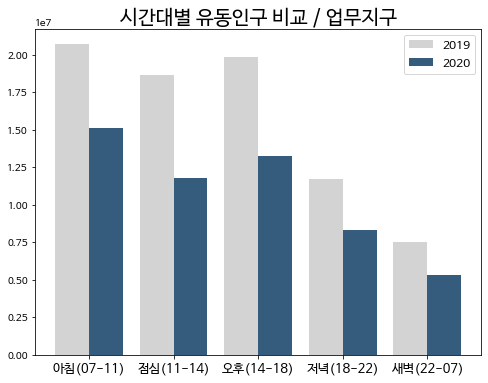

In [ ]:
fig = plt.figure(figsize=(8,6))

plt.bar(skt1_19.index-0.2, skt1_19['유동인구'], width=0.4, color = 'lightgrey', label="2019")
plt.bar(skt1_20.index+0.2, skt1_20['유동인구'], width=0.4, color = '#355C7D', label="2020")

plt.legend(loc='upper right', prop={'size': 12})
plt.title('시간대별 유동인구 비교 / 업무지구', size=20)
plt.xticks(np.arange(5), labels=('아침(07-11)', '점심(11-14)', '오후(14-18)', '저녁(18-22)', '새벽(22-07)'))
plt.tick_params(axis="x", labelsize=13)

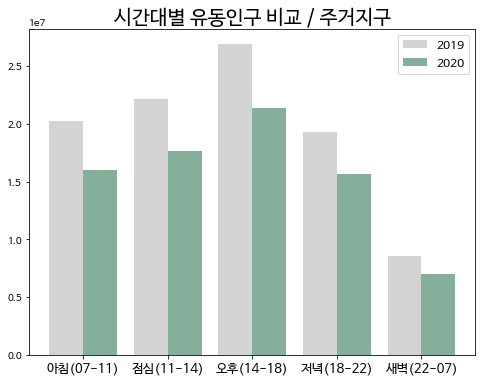

In [ ]:
fig = plt.figure(figsize=(8,6))

plt.bar(skt2_19.index-0.2, skt2_19['유동인구'], width=0.4, color = 'lightgrey', label="2019")
plt.bar(skt2_20.index+0.2, skt2_20['유동인구'], width=0.4, color = '#83AF9B', label="2020")

plt.legend(loc='upper right', prop={'size': 12})
plt.title('시간대별 유동인구 비교 / 주거지구', size=20)
plt.xticks(np.arange(5), labels=('아침(07-11)', '점심(11-14)', '오후(14-18)', '저녁(18-22)', '새벽(22-07)'))
plt.tick_params(axis="x", labelsize=13)

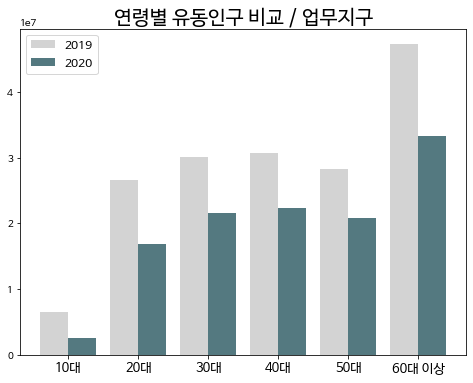

In [ ]:
fig = plt.figure(figsize=(8,6))

plt.bar(ska1_19.index-0.2, ska1_19['유동인구'], width=0.4, color = 'lightgrey', label="2019")
plt.bar(ska1_20.index+0.2, ska1_20['유동인구'], width=0.4, color = '#547980', label="2020")

plt.legend(loc='upper left', prop={'size': 12})
plt.title('연령별 유동인구 비교 / 업무지구', size=20)
plt.xticks(np.arange(6), labels=('10대', '20대', '30대', '40대', '50대', '60대 이상'))
plt.tick_params(axis="x", labelsize=13)

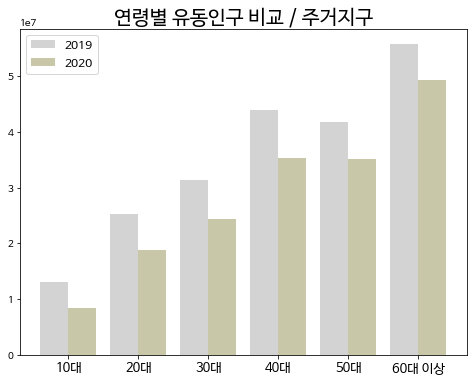

In [ ]:
fig = plt.figure(figsize=(8,6))

plt.bar(ska2_19.index-0.2, ska2_19['유동인구'], width=0.4, color = 'lightgrey', label="2019")
plt.bar(ska2_20.index+0.2, ska2_20['유동인구'], width=0.4, color = '#C8C8A9', label="2020")

plt.legend(loc='upper left', prop={'size': 12})
plt.title('연령별 유동인구 비교 / 주거지구', size=20)
plt.xticks(np.arange(6), labels=('10대', '20대', '30대', '40대', '50대', '60대 이상'))
plt.tick_params(axis="x", labelsize=13)